In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.constants import pi, m_e, k

In [35]:
T = 300.0

In [36]:
def box_muller(mean, std):
    
    while True:
        x = np.random.random(2)
        
        x = 2.0*x - 1.0
        w = x[0]**2 + x[1]**2
        
        if (w < 1.0):
            break
    
    y = x*np.sqrt(-2.0*np.log(w) / w)
    return y*std + mean

In [37]:
def MB():
    mean = 0.0
    std = np.sqrt(k * T / m_e )
    v = np.array([0.0, 0.0, 0.0])
    
    v[0], v[1] = box_muller(mean, std)
    v[2], _    = box_muller(mean, std)
    
    v[2] = np.abs(v[2]) # Positive velocity in z-direction
    return v

In [53]:
N = 500000
speed = np.zeros([N])
for i in range(N):
    v = MB()
    speed[i] = np.linalg.norm(v)
    

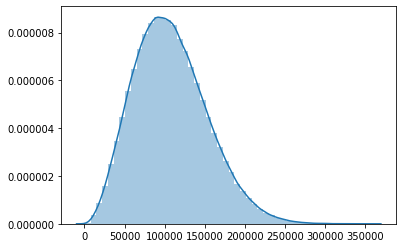

In [54]:
sns.distplot(speed)

In [55]:
print(np.mean(speed))
print(np.var(speed))

107687.20183538613
2058723930.311274


In [56]:
a = np.sqrt(k*T/m_e)
mean = 2*a*np.sqrt(2/pi)
print(mean)

107603.83650053783


In [57]:
var = a**2*(3*pi-8)/pi
print(var)

2062114202.7480311


In [58]:
print(np.abs(np.mean(speed) - mean))
print(np.abs(np.mean(speed) - mean)/mean*100)

83.36533484830579
0.07747431463365075


In [59]:
print(np.abs(np.var(speed) - var))
print(np.abs(np.var(speed) - var)/var*100)

3390272.4367570877
0.16440759838805805
